# My final project (recommendation system)

## Recommendation system for the online hypermarket Instacart

**Task description (legend)**<br/>
<br/>
Hello! In this final project, the company Instacart has come to you for help in building their recommendation system. Below is a letter in which they describe what they want.<br/>
<br/>
Regardless of whether you buy spontaneously or plan your purchases carefully, your unique consumer behavior determines who you are. Instacart is an application for ordering and delivering groceries. It helps simplify the process of filling your fridge with your favorite products when you need them. After selecting items through the Instacart app, our employees review the order, make purchases, and deliver them from the store to the customer's home.<br/>
<br/>
Our Data Science team plays a huge role in organizing this user experience. Currently, we use transactional data to develop models that predict which products the user will buy again, try for the first time, or add to their cart during the session.<br/>
<br/>
The list of goods and products is enormous, and it can be difficult to search for something in it. Therefore, we want to help the user by showing them the products that they are most likely to want to buy. Use anonymous data about customer orders to predict which products they will order next time. We will display your predictions to customers on the main page to make the service more convenient.<br/>
<br/>
And if you are not only very good at creating models, but also able to deploy them in production, we have an additional request. Wrap the developed algorithm in a Python library that our backend developers can use in the future.<br/>
<br/>
**Technical task for the final project**<br/>
 - The final project is a competition on the Kaggle platform. [Link](https://www.kaggle.com/competitions/skillbox-recommender-system/overview).
 - You need to write reproducible code that generates a file with 10 items for each customer that they are most likely to purchase in the next transaction.
 - You can submit no more than five solutions for validation per day. In the Leaderboard tab, you can find two basic solutions:
     - The top 10 popular products for all customers (the same as in the sample_submission.csv file).
     - A benchmark solution that you need to beat to achieve a score of no less than satisfactory.
 - You can find the data description, file format for the response, and quality metric in the competition on Kaggle.

**Requirements**<br/>
<br/>
The project does not have strict requirements for the algorithms to be used in its implementation. Hybrid recommender systems and approaches/algorithms covered during the theoretical classes are encouraged to be used.<br/>
<br/>
**Enhancements and Additions to the Task**<br/>
<br/>
The system of generating a file with products that will be in the customer's next purchase is not always suitable for production output. Fulfill the client's additional request: wrap the developed recommendation system into a Python class with the following methods:
- Provide a set of K most relevant products for a user by user ID.
- Provide an array of sets of K most relevant products for users by an array of user IDs.
- Add fresh transaction data.
- Update/add data on product characteristics.
- Retrain the recommendation system.<br/>

When implementing the class, ensure the efficiency of the method's speed and memory usage. Try to use parallel computing where possible. The target model should be trained in no more than five hours and make predictions for all customers in no more than 15 minutes.

**The delivery format and evaluation are as follows:**<br/>
<br/>
The first step is to ensure that the solution on Kaggle receives a score higher than the "Pass" grade (0.20954). Solutions will be evaluated based on the MAP@10 metric. In addition to the solution, please send us the code of the developed recommendation system in GitHub/GitLab. The code must be fully executable and covered with comments. Please specify instructions for running the code in the README.<br/>
In the code, keep all the solutions that were tested during the thesis work. This way, we can evaluate the volume and number of experiments conducted. However, please remember that more experiments are not always better!<br/>
The pass criterion is a solution with a metric higher than the corresponding "Pass" benchmark (MAP@10 > 0.20954) on the Kaggle platform and the submission of reproducible solution code.<br/>
To obtain a "B" grade, in addition to the "Pass" benchmark, you need to complete any two items from the following:
- A hybrid approach to the recommendation system.
- Complete all items from the "Improvements and Additions to the Task" section.
- Structured code (the main logic of the code should be placed in classes/methods/functions + meaningful naming of entities and comments).
- The quality of the model should not change depending on the seasonality.<br/>

To obtain a "A" grade, you need to score > 0.25 + complete all the items for the "4" grade, except for "Improvements and Additions to the Task." A significant bonus in evaluation will be the completion of the "Improvements and Additions" item and the correct assessment of the solution offline on cross-validation.

## Main stages

I am going to divide this huge project into two stages:
- `Stage 1` - come up with certain ideas for our recommendation system, ensure if they will work out and outline some pipeline for the future system.
- `Stage 2` - wrap all ideas into more-or-less working python code.<br/>

This notebook is about `Stage 1`.<br/>
<br/>
**Content of the notebook:**

1. [**Basic presets**](#1)
2. [**Data preparation**](#2)
3. [**Products data analysis**](#3)
4. [**Modeling**](#4)
5. [**Conclusion**](#5)

## Basic presets<a id='1'></a>

In [9]:
# All libraries required

# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.transforms import Bbox
import seaborn as sns
palette = plt.get_cmap('Set2')
plt.style.use('seaborn-darkgrid')

# ML
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score

# Parallel calculations
import asyncio
import nest_asyncio
nest_asyncio.apply()
asyncio.set_event_loop(asyncio.new_event_loop())

# Other
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Printing some of dataframe statistics function

def df_stat(data:pd.DataFrame) -> None:
    
    """ Prints some statistics of dataframe """
    
    assert isinstance(data, pd.DataFrame), 'Wrong type of input!'
    
    print(f'Number of rows: {data.shape[0]}')
    print(f'Memory usage: {data.memory_usage().sum() / 1e6:.2f} MB')
    
    out = data.isnull().sum().to_frame().rename(columns={0: 'Missing'}).join(
                                                                    data.dtypes.to_frame().rename(columns={0: 'Dtype'})
                                                                )
    print()
    print(out)

## Data preparation<a id='2'></a>

Let's have a look at the original data files.

In [4]:
# Products

products = pd.read_csv('products.csv', sep=',')

df_stat(data=products)

products.head()

Number of rows: 49688
Memory usage: 2.39 MB

               Missing   Dtype
product_id           0   int64
product_name         0  object
aisle_id             0   int64
department_id        0   int64
aisle                0  object
department           0  object


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [4]:
# Transactions

trans = pd.read_csv('transactions.csv', sep=',')

df_stat(data=trans)

trans.head()

Number of rows: 26408073
Memory usage: 1901.38 MB

                        Missing    Dtype
order_id                      0    int64
user_id                       0    int64
order_number                  0    int64
order_dow                     0    int64
order_hour_of_day             0    int64
days_since_prior_order  1045204  float64
product_id                    0    int64
add_to_cart_order             0  float64
reordered                     0  float64


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,1,2,8,NaN,196,1.0,0.0
1,2539329,1,1,2,8,NaN,14084,2.0,0.0
2,2539329,1,1,2,8,NaN,12427,3.0,0.0
3,2539329,1,1,2,8,NaN,26088,4.0,0.0
4,2539329,1,1,2,8,NaN,26405,5.0,0.0


___
In my opinion, working with one dataframe instead of two is more convenient.

In [54]:
# Alltogether

df = trans.merge(
            products[['product_id', 'aisle_id', 'department_id']], on='product_id'
)

df_stat(data=df)

Number of rows: 26408073
Memory usage: 2535.18 MB

                        Missing    Dtype
order_id                      0    int64
user_id                       0    int64
order_number                  0    int64
order_dow                     0    int64
order_hour_of_day             0    int64
days_since_prior_order  1045204  float64
product_id                    0    int64
add_to_cart_order             0  float64
reordered                     0  float64
aisle_id                      0    int64
department_id                 0    int64


___
As we can see, our dataframe is quite heavy and some column data types seems to be too much for data that they are representing.

In [55]:
# Trying to save some memory

for col in df.columns:
    
    if isinstance(df[col].iloc[0], np.int64):
        df[col] = df[col].astype(np.int32)
        
    elif isinstance(df[col].iloc[0], np.float64):
        df[col] = df[col].astype(np.float32)
        
    else:
        continue

# Checking out

df_stat(data=df)

Number of rows: 26408073
Memory usage: 1373.22 MB

                        Missing    Dtype
order_id                      0    int32
user_id                       0    int32
order_number                  0    int32
order_dow                     0    int32
order_hour_of_day             0    int32
days_since_prior_order  1045204  float32
product_id                    0    int32
add_to_cart_order             0  float32
reordered                     0  float32
aisle_id                      0    int32
department_id                 0    int32


___
Let's split our dataframe into train and test data. My idea is to train my model on all orders for each user but the last one. The last purchase is for validation. Also we need not splitted data to make final submission later.

In [56]:
# Providing custom train_test_split (test - only last purchase for each user, train - the other purchases)

df = df.merge(
            df.groupby('user_id')['order_number'].max().reset_index().rename(columns={'order_number': 'last_order'})
           ,on='user_id'
)

df_train, df_test = df[~df['order_number'].eq(df['last_order'])], df[df['order_number'].eq(df['last_order'])]

for data, file_name in zip((df, df_train, df_test), ('main_data','train', 'test')):
    data.to_csv(f'{file_name}.csv', index=False)

In [98]:
# Free some space

del df, df_train, df_test, data, products

## Products data analysis<a id='3'></a>

We will use only train data for the analysis. The goal is to get embeddings for each product in dataframe. Since embeddings are done, we can assess similarity of products via some distance metrics (ex. euclidian). In other words, I suggest to try item-based method for our system.

In [37]:
df = pd.read_csv('train.csv')

### Data agregation

In [101]:
# Aggregating

df_agg = df.groupby(['product_id', 'aisle_id', 'department_id'])\
           .agg({
                 'user_id': 'nunique' # how many users
                ,'order_dow': 'median' # what day of the week
                ,'order_hour_of_day': 'median' # what time of a day
                ,'days_since_prior_order': 'mean' # how often
                ,'add_to_cart_order': 'median' # what position
                ,'reordered': 'sum' # how many reorders
        }).reset_index().rename(
                            columns={
                                 'user_id': 'n_users'
                                ,'order_dow': 'median_dow'
                                ,'order_hour_of_day': 'median_hour_of_day'
                                ,'days_since_prior_order': 'mean_days_between_orders'
                                ,'add_to_cart_order': 'median_cart_position'
                                ,'reordered': 'total_reordered'                                          
                            }
                        )

df_stat(data=df_agg)

df_agg.head()

Number of rows: 49413
Memory usage: 3.56 MB

                          Missing    Dtype
product_id                      0    int64
aisle_id                        0    int64
department_id                   0    int64
n_users                         0    int64
median_dow                      0  float64
median_hour_of_day              0  float64
mean_days_between_orders       56  float64
median_cart_position            0  float64
total_reordered                 0  float64


,product_id,aisle_id,department_id,n_users,median_dow,median_hour_of_day,mean_days_between_orders,median_cart_position,total_reordered
0,1,61,19,485,3.0,13.0,8.918789,4.0,1008.0
1,2,104,13,63,3.0,13.0,9.647887,9.0,10.0
2,3,94,7,51,2.0,11.0,9.296460,4.5,187.0
3,4,38,1,104,2.0,14.0,12.566845,8.0,96.0
4,5,5,13,3,2.0,11.0,11.090909,6.0,8.0


___
We have got certain products which have been purchased only once. I'd like to save them into another dataframe.

In [103]:
# Saving sigle-purchase products

exceptions = df_agg[pd.isna(df_agg['mean_days_between_orders'])]['product_id'].values

In [104]:
# Features we'd like to examine

num_cols = ['n_users', 'mean_days_between_orders', 'median_cart_position', 'total_reordered'] # numeric
cat_cols = ['aisle_id', 'department_id', 'median_dow', 'median_hour_of_day'] # categorical

In [105]:
# Finally

for col in cat_cols:
    df_agg[col] = df_agg[col].astype(np.int32).astype(str) # a thing of beauty
    
df_agg_main = df_agg[~df_agg['product_id'].isin(exceptions)] # for clustering
df_agg_exc = df_agg[df_agg['product_id'].isin(exceptions)] # not for clustering

del df, df_agg

### Clustering

One of the best ways to find similarities in data is clustering. We are going to use simple KMeans algorithm with elbow method to calculate optimal number of clusters. As we have categorical features in the dataframe, we need to transform them into numeric type. I'd like to apply one-hot encoding.

In [107]:
# Create features matrix

num_features = df_agg_main[num_cols] # numeric

cat_features = pd.get_dummies(df_agg_main[cat_cols]) # categorical

cols = num_features.columns.tolist() + cat_features.columns.tolist()

x = np.hstack([
             num_features.values.reshape(df_agg_main.shape[0], -1)
            ,cat_features.values.reshape(df_agg_main.shape[0], -1)
])

del num_features, cat_features

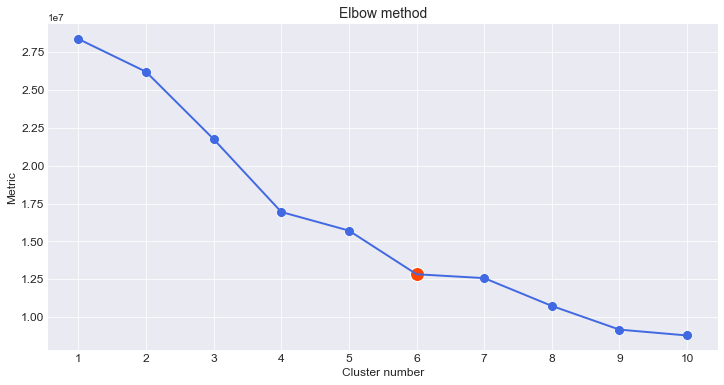

Wall time: 19.3 s


In [109]:
%%time

# Finding optimal cluster number

k_limit = 10

models = {key: None for key in range(1, k_limit + 1)}
metrics = {key: None for key in range(1, k_limit + 1)}

for k in range(1, k_limit + 1):
    models[k] = KMeans(n_clusters=k, random_state=17).fit(x)
    centroids, labels = models[k].cluster_centers_, models[k].labels_
    
    metric = 0
    for centroid in range(k):
        metric += euclidean_distances(x[labels==centroid], centroids[centroid,:].reshape(1, -1)).sum(axis=0)[0]
    
    metrics[k] = metric
    
D = {k: abs(metrics.get(k + 1, 0) - metrics[k]) / abs(metrics[k]- metrics.get(k - 1, 0)) for k in range(2, k_limit + 1)}

best_k = min(D.items(), key=lambda x: x[1])[0]
# print(f'Best cluster number: {best_k}')

# Visualizing

fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=False, bottom=False, right=True)

sns.lineplot(
             x=metrics.keys()
            ,y=metrics.values()
            ,linewidth=1.95
            ,markers=True
            ,color='royalblue'
            ,ax=ax
)

sns.scatterplot(
             x=metrics.keys()
            ,y=metrics.values()
            ,s=100
            ,color='royalblue'
            ,ax=ax
)

sns.scatterplot(
             x=[best_k]
            ,y=[metrics[best_k]]
            ,s=200
            ,color='orangered'
            ,ax=ax
)

ax.set_xticks(list(metrics.keys()))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Cluster number', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.title('Elbow method', fontsize=14)

canvas = FigureCanvasAgg(fig)
fig.canvas.draw()
renderer = fig._cachedRenderer
tightbox = fig.get_tightbbox(renderer)
w, h = fig.get_size_inches()
bbox = Bbox.from_extents(min(tightbox.x0, 0), min(tightbox.y0, 0), max(tightbox.x1, w), max(tightbox.y1, h))
plt.savefig('elbow_prod.png', bbox_inches=bbox)

plt.show()

In [110]:
%%time

# Best model

best_model = models[best_k]

# Best score

score = silhouette_score(x, best_model.labels_)
print(f'Silhouette score: {score:.3f}')

Silhouette score: 0.921
Wall time: 25 s


___
Well, silhouette score is very high with `6` clusters. Let's see how these cluster are distributed.

In [113]:
# Cluster labels

df_agg_main['Cluster'] = best_model.labels_

# What we have got

print('Cluster distribution:')
df_agg_main['Cluster'].value_counts()

Cluster distribution:


0    47877
4     1240
5      177
2       52
1        9
3        2
Name: Cluster, dtype: int64

In [114]:
# Centroids

centroids = pd.DataFrame(
                         data={col: cluster for col, cluster in zip(cols, best_model.cluster_centers_.T)}
                        ,index=range(df_agg_main['Cluster'].nunique())
                )

centroids[num_cols]

,n_users,mean_days_between_orders,median_cart_position,total_reordered
0,92.696786,9.956669,7.389091,110.440546
1,27979.777778,9.374265,5.333333,115040.777778
2,14633.153846,9.460622,6.211538,40331.692308
3,41524.500000,9.200312,3.500000,300354.500000
4,2025.572581,9.671554,6.573387,3716.799194
5,6170.683616,9.546460,6.282486,14471.152542


___
Here we can see that large amount of our products is not so popular based on unique users and total reorders.

In [115]:
# Reducing features space

pca = PCA(n_components=2).fit(x)
x_pca = pca.transform(x)
centroids_pca = pca.transform(centroids.values)

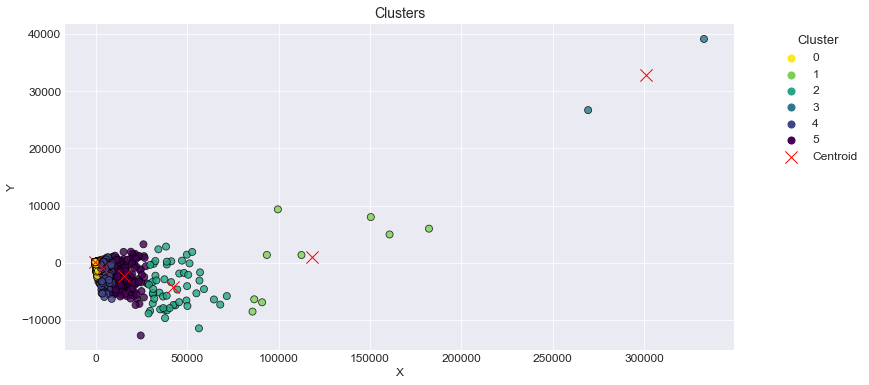

In [116]:
# Visualizing

res = pd.DataFrame( 
                data={
                     'X': x_pca[:, 0]
                    ,'Y': x_pca[:, 1]
                    ,'Cluster': best_model.labels_      
                }
                ,index=list(range(x_pca.shape[0]))
)

fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=False, bottom=False, right=True)

sns.scatterplot( 
             data=res
            ,x='X'
            ,y='Y'
            ,hue='Cluster'
            ,alpha=0.8
            ,palette='viridis_r'
            ,edgecolor='black'
            ,linewidth=.8
            ,size='Cluster'
            ,sizes=(50, 50)
            ,ax=ax
)

tmp = pd.DataFrame( 
                data={
                     'X': centroids_pca[:, 0]
                    ,'Y':centroids_pca[:, 1]
                }
                ,index=list(range(centroids.shape[0]))
)

sns.scatterplot( 
             data=tmp
            ,x='X'
            ,y='Y'
            ,color='red'
            ,label='Centroid'
            ,linewidth=1.0
            ,marker='x'
            ,s=150
            ,ax=ax
)

ax.tick_params(labelsize=12)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Clusters', fontsize=14)

ax.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=12)
ax.legend_.set_title('Cluster')
ax.legend_.get_title().set_fontsize(13)

canvas = FigureCanvasAgg(fig)
fig.canvas.draw()
renderer = fig._cachedRenderer
tightbox = fig.get_tightbbox(renderer)
w,h = fig.get_size_inches()
bbox = Bbox.from_extents(min(tightbox.x0, 0), min(tightbox.y0, 0), max(tightbox.x1, w), max(tightbox.y1, h))
plt.savefig('Clusters_prod.png', bbox_inches=bbox)

plt.show()

___
This is how our clustered data looks like in reduced space.<br/> 
But now it's time to make our embeddings. I'm going to include: numeric features, categorical features (one-hot style) and clusters (one-hot style). Also I suggest to add an extra cluster for our exceptions (single-purchased products).

In [118]:
# Additional cluster for exceptions

df_agg_exc['Cluster'] = -1

# Alltogether

prod_emb = (pd.concat([df_agg_main, df_agg_exc], ignore_index=True)).reset_index().assign(indx=lambda x: x.index)

prod_emb = prod_emb[['indx', 'product_id'] + num_cols]\
                                                .join(pd.get_dummies(prod_emb[cat_cols]))\
                                                .join(pd.get_dummies(prod_emb['Cluster']))

prod_emb.to_csv('product_embedding.csv', index=False)

del x, df_agg_main, df_agg_exc, prod_emb

### Nearest Neighbors

We have embeddings, therefore we can measure similaraties/differences between all products. In other words, we need to be able to search neighbors for products in our data. Let's create and train NearestNeighbors model from sklearn. I'm going to use euclidean distance metric.

In [11]:
# Loading data

prod_emb = pd.read_csv('product_embedding.csv')

In [12]:
%%time

# NearestNeighbors

emb_cols = prod_emb.columns[2:]
prod_emb.fillna(prod_emb['mean_days_between_orders'].median(), inplace=True) # the weakest point

neigh = NearestNeighbors(n_jobs=-1, metric='euclidean').fit(prod_emb[emb_cols].values)

Wall time: 2.93 s


<div class="alert alert-warning">
<b>The weakest point:</b> Feature `mean_days_between_orders` cannot be defined for single-purchased products. Here I just filled `NaN` with the median, but actually it's wrong. That's why I decided to drop these products in my following attempts. As there are not so many "problem" products, final score of the model remains quite stable. </div>

And here is my favorite part. Since we have NearestNeighbors model, we can find **k** nearest neighbors for each product now and save it into a file. When we need to make predictions, we will use this file without additional calculations. By the way, it's my first time of using parallel calculations.

In [14]:
%%time

# List for coroutines results

tmp_res_list = []

async def knn(prod_id:int, k:int=10) -> None:
    
    """ Coroutine that finds k nearest neighbors to selected product """
    
    neighbors = neigh.kneighbors(
                             prod_emb[prod_emb['product_id'].eq(prod_id)][emb_cols].values
                            ,n_neighbors=k
                            ) 
    tmp = pd.DataFrame({
                     'product_id_x': [prod_id] * k
                    ,'indx': neighbors[1][0]
                    ,'Metric': neighbors[0][0]
            
        })   
    tmp_res_list.append(tmp)
    
async def main(k:int=10):
    
    """ Main coroutine that schedules the other coroutines """

    tasks = [asyncio.create_task(knn(prod, k)) for prod in prod_emb['product_id'].values]

    await asyncio.gather(*tasks)

# Create an event loop and run the main coroutine

loop = asyncio.get_event_loop()
loop.run_until_complete(main(10))

loop.run_until_complete(loop.shutdown_asyncgens())
    
prod_knn_df = pd.DataFrame()
for elem in tmp_res_list:
    prod_knn_df = pd.concat([prod_knn_df, elem], ignore_index=True)

prod_knn_df.to_csv(f'product_knn_{10}.csv', index=False)
    
del tmp_res_list, prod_knn_df
    
asyncio.set_event_loop(asyncio.new_event_loop())

Wall time: 4min 39s


___
Calculations in the "classic" way could take up to 6-8 hours. I tried.

## Modeling<a id='4'></a>

Basically, we need to load data.

In [16]:
df_train = pd.read_csv('train.csv') # train
df_test = pd.read_csv('test.csv') # test

users = np.sort(df_train ['user_id'].unique()) # all users

___
Here is my idea about recommendations for our users. I suppose that the majority of customers tends to buy same products over and over again. Although they have heard something about diversity, consumer habits are tough to resist. If we decide to follow this idea, the most reasonable recommendation system will recommend products which already have been purchased. Next step of this idea is prioritizing these products for each user. In my opinion, the easiest way to do it is to assign the weight coefficient to the every product. Number of orders (how many times this user bought this product) seems to be ideal for this job. Finally, due to the fact that we need only top **k** products to predict, we can use only top **k** products from previous purchases sorted by our weight coefficient. Lets look at the example below (`user_id` = `1`).

In [50]:
# Example

user_ex = df_train[df_train['user_id'].eq(1)].assign(dummy=1)\
                                             .groupby(['user_id', 'product_id'])\
                                             .agg({'dummy': 'sum'})\
                                             .assign(weight=lambda x: x.dummy )\
                                             .sort_values(['user_id', 'weight'], ascending=False)\
                                             .reset_index()\
                                             .groupby('user_id')\
                                             .apply(lambda x: x.iloc[: 10])[['user_id', 'product_id', 'weight']]

user_ex

user_id  product_id  weight
user_id                               
1       0        1         196       9
        1        1       12427       9
        2        1       10258       8
        3        1       25133       7
        4        1       13032       2
        5        1       13176       2
        6        1       26088       2
        7        1       26405       2
        8        1       46149       2
        9        1       49235       2

___
But what are we going to if our user doesn't have **k** different products in his costumer history?<br/> 
Or do we really need to recommend products purchased only twice (look at the example above)?<br/>
<br/>
My solution is to find **k** nearest neighbors for each product in list, then sort them by using distance metric (column `Metric`) and select top **k** products. Sounds good, but it would be even better if we took into account priority of each product which was discussed earlier. My suggestion is to use this formula: `NewMetric` = (`Metric` + 1) / `weight`. We still can recommend old products (`Metric` = 0), but also we can recommend products their neaighbors. When `weight` is large "close" neighbors become even "closer", therefore sometimes it is likely to see new product in recommendations. Let's check how it works.

In [29]:
# kNearestNeabors

knn_ex = pd.read_csv(f'product_knn_{10}.csv')   
knn_ex = knn_ex.merge(prod_emb, on='indx')[['product_id_x', 'product_id', 'Metric']]\
                                        .rename(columns={'product_id_x': 'product_id', 'product_id': 'product_id_y'})

knn_ex.head()

,product_id,product_id_y,Metric
0,1,1,0.000000
1,1804,1,25.885248
2,8381,1,13.245820
3,13447,1,6.222959
4,20906,1,15.544019


In [56]:
# Finally

out = user_ex.merge(knn_ex, on='product_id')[['user_id', 'product_id', 'weight', 'product_id_y', 'Metric']]
    
out['Metric'] = (out['Metric'] + 1) / out['weight']
        
out = out.sort_values(['user_id', 'Metric'], ascending=True)\
                                            .reset_index()\
                                            .groupby('user_id')\
                                            .apply(lambda x: x.iloc[: 10])\
                                            .rename(columns={'user_id': 'user_id_y'})\
                                            .groupby('user_id_y')['product_id_y'].agg(list).values

print(f'Prediction: {out[0]}')

Prediction: [196, 12427, 10258, 25133, 13032, 13176, 26088, 26405, 46149, 49235]


___
In this case we recommend only "old" products, which can be explained that "close" neighbors aren't "close" enough. Let's make prediction for all users and evaluate our model.

In [18]:
# Users purchase history

def get_users_history(data:pd.DataFrame, users:(list, np.ndarray), k:int=10) -> pd.DataFrame:
    
    """ Returns top k products for each user in users sorted by number of orders """
    
    out = data[data['user_id'].isin(users,)].assign(dummy=1)\
                                            .groupby(['user_id', 'product_id'])\
                                            .agg({'dummy': 'sum'})\
                                            .assign(weight=lambda x: x.dummy )\
                                            .sort_values(['user_id', 'weight'], ascending=False)\
                                            .reset_index()\
                                            .groupby('user_id')\
                                            .apply(lambda x: x.iloc[: k])[['user_id', 'product_id', 'weight']]
    
    return out

In [57]:
# knn dataframe

def get_products_neighbors(k:int=10) -> pd.DataFrame:
    
    """ Returns dataframe with k nearest neighbors for each product """
    
    out = pd.read_csv(f'product_knn_{k}.csv')   
    out = out.merge(prod_emb, on='indx')[['product_id_x', 'product_id', 'Metric']]\
                                        .rename(columns={'product_id_x': 'product_id', 'product_id': 'product_id_y'})
    
    return out

In [58]:
# Make prediction

def predict(data:pd.DataFrame, users:(list, np.ndarray), k:int=10) -> pd.Series:
    
    """ Returns top k recommended products for each user in users """
    
    user_hist = get_users_history(data=data, users=users, k=k)  
    prod_neigh = get_products_neighbors(k=k)
    
    out = user_hist.merge(prod_neigh, on='product_id')[['user_id', 'product_id', 'weight', 'product_id_y', 'Metric']]
    
    out['Metric'] = (out['Metric'] + 1) / out['weight']
        
    out = out.sort_values(['user_id', 'Metric'], ascending=True)\
                                            .reset_index()\
                                            .groupby('user_id')\
                                            .apply(lambda x: x.iloc[: k])\
                                            .rename(columns={'user_id': 'user_id_y'})\
                                            .groupby('user_id_y')['product_id_y'].agg(list)
    
    return out

In [19]:
# Sample

predict(df_train, [1, 7])

user_id_y
1    [196, 12427, 10258, 25133, 46149, 49235, 14084...
7    [10895, 21137, 47272, 37602, 45628, 39275, 408...
Name: product_id_y, dtype: object

___
Model will be evaluated by MAP@10 metric, which is average value of Precision@10.

In [59]:
# Evaluation metric

def precision(arr1:(list, np.ndarray), arr2:(list, np.ndarray), n:int=10) -> float:
    
    """ Returns Precision@n score for two arrays """
    
    assert isinstance(arr1, (list, np.ndarray)) * isinstance(arr2, (list, np.ndarray)), 'Wrong type of input!'
    
    return len(set(arr1) & set(arr2)) / n

In [32]:
%%time

# Predictions for all users

pred = predict(df_train, users)

Wall time: 2min 21s


In [33]:
%%time

# Calculating score

res = []
for user, arr1 in zip(pred.index, pred.values):
    arr2 = df_test[df_test['user_id'].eq(user)]['product_id'].values
    res.append(precision(arr1, arr2))
    
res = np.mean(res)
print(f'MAP@n score: {res:.3f}')

MAP@n score: 0.293
Wall time: 2min 6s


<div class="alert alert-success">
Final score online for this model was 0.277. We can consider this as success!</div>

## Conclusion<a id='5'></a>

To summarize, we did a good job. We created model which is better than basic solution and our score is even higher than `0.25`. Despite the fact that the main idea is straighter than a straight line, it provides quite good results and trains very fast. The pipeline from original data files from Kaggle to submission file for all users takes about 11 minutes. Additionally, we were able to use parallel calculations successfully, which helped us to shorten train time.<br/>
<br/>
The one thing left by now - wrapping this idea into working python code (`Stage 2`) to complete the task.